In [1]:
# Arman Hussain
# Full Time
# Friday 27th March 2020
# Dave Baker 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data Cleaning

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
#We are dropping the columns that are not needed as specified below

df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement',
                 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [5]:
#This displays the first 5 rows

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [6]:
#This displays the bottom 5 rows

df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004
21596,1523300157,325000.0,2,0.75,1020,1076,2.0,0.0,3,7,2008


In [7]:
#This cell looks for the number of rows and columns after getting rid of the unwanted columns 

df.shape

(21597, 11)

In [8]:
#This cell summarizes the descriptive statistics including the central tendency, dispersion, and shape of the df

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [9]:
#Looking for which column has missing values

df.isna().any()

id             False
price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
floors         False
waterfront      True
condition      False
grade          False
yr_built       False
dtype: bool

In [10]:
#Looking for how many missing values

df['waterfront'].isna().sum()

2376

In [11]:
#Dropping all the missing values in the waterfront column

df.dropna(subset=['waterfront'], inplace=True)

In [12]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [13]:
#Checking to see the number of rows after the missing values were dropped

df.shape

(19221, 11)

In [46]:
#We are inspecting the number the number of duplicate rows
DuplicatesInDf = df[df.duplicated()]
print("Number of Duplicates in DataFrame:", DuplicatesInDf.shape)

Number of Duplicates in DataFrame: (0, 11)


In [15]:
#We can see that there are only 2 rows of duplicates. We can drop these

df = df.drop_duplicates()

In [16]:
#This indicates the number of rows after dropping the duplicates

df.count()

id             19219
price          19219
bedrooms       19219
bathrooms      19219
sqft_living    19219
sqft_lot       19219
floors         19219
waterfront     19219
condition      19219
grade          19219
yr_built       19219
dtype: int64

In [17]:
#Visually inspecting the dataframe after dropping the duplicates rows and missing values

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001


In [18]:
#Checking if there are any strings present in the dataframe which would req conversion to integers before plotting

df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [19]:
#Checking to see the correlations between columns before deciding on plots
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.017446,0.003729,0.007003,-0.011983,-0.133402,0.018143,-0.004167,-0.022101,0.007633,0.022983
price,-0.017446,1.000000,0.309657,0.527353,0.704653,0.087007,0.258281,0.276296,0.038043,0.667241,0.053520
bedrooms,0.003729,0.309657,1.000000,0.516220,0.578219,0.029396,0.182445,-0.002390,0.025033,0.360060,0.157573
bathrooms,0.007003,0.527353,0.516220,1.000000,0.756350,0.085109,0.506195,0.067288,-0.126398,0.666886,0.506996
sqft_living,-0.011983,0.704653,0.578219,0.756350,1.000000,0.173346,0.357198,0.110230,-0.057466,0.764071,0.317465
sqft_lot,-0.133402,0.087007,0.029396,0.085109,0.173346,1.000000,-0.007220,0.023141,-0.014131,0.114600,0.055909
floors,0.018143,0.258281,0.182445,0.506195,0.357198,-0.007220,1.000000,0.021893,-0.263447,0.458085,0.490196
waterfront,-0.004167,0.276296,-0.002390,0.067288,0.110230,0.023141,0.021893,1.000000,0.017637,0.087393,-0.026070
condition,-0.022101,0.038043,0.025033,-0.126398,-0.057466,-0.014131,-0.263447,0.017637,1.000000,-0.144474,-0.361941
grade,0.007633,0.667241,0.360060,0.666886,0.764071,0.114600,0.458085,0.087393,-0.144474,1.000000,0.446266


In [20]:
#Now to detect the outliers by using box plots. Box plots are useful in EDA to show the general shape, central values,
#and variability using and interval scale. They also provide a general indication of the data skewness. 


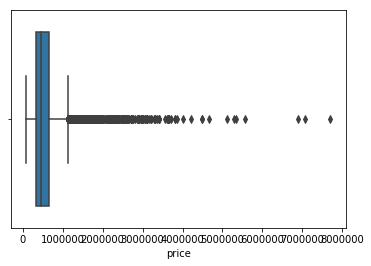

In [21]:
#Box plot of price

sns.boxplot(x=df['price'])

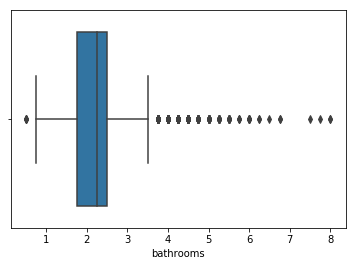

In [22]:
#Boxplot of bathrooms

sns.boxplot(x=df['bathrooms'])

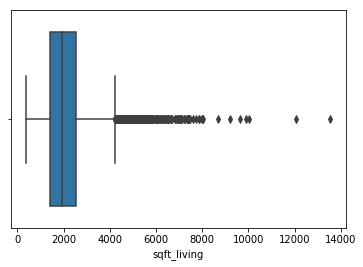

In [23]:
#Boxplot of sqft_living

sns.boxplot(x=df['sqft_living'])

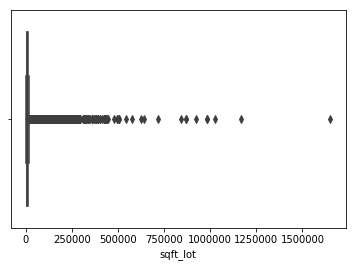

In [24]:
#Boxplot of sqft_lot

sns.boxplot(x=df['sqft_lot'])

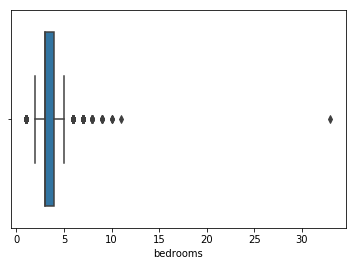

In [25]:
#Boxplot of bedrooms

sns.boxplot(x=df['bedrooms'])

In [26]:
Quarter1 = df.quantile(0.25)
Quarter3 = df.quantile(0.75)
InterQuartileRange = Quarter3 - Quarter1
print(InterQuartileRange)

id             5.210452e+09
price          3.222500e+05
bedrooms       1.000000e+00
bathrooms      7.500000e-01
sqft_living    1.120000e+03
sqft_lot       5.676500e+03
floors         1.000000e+00
waterfront     0.000000e+00
condition      1.000000e+00
grade          1.000000e+00
yr_built       4.600000e+01
dtype: float64


In [27]:
df = df[~((df < (Quarter1-1.5 * InterQuartileRange)) | (df > (Quarter3 + 1.5 * InterQuartileRange))).any(axis=1)]
df.shape

(15097, 11)

In [28]:
#Based on the technique we just used to detect and remove outliers we can deduce that there were 4122 rows of outliers

# Data Visualization and EDA

# Business Questions 

1 - How is the price of the property affected by the other variables such as bedrooms, bathrooms, sqft_living, and sqft_lot?

2 - What is the relationship between the number of bedrooms and price of property? 

3 - What is the relationship between the number of bathrooms and price of property? 


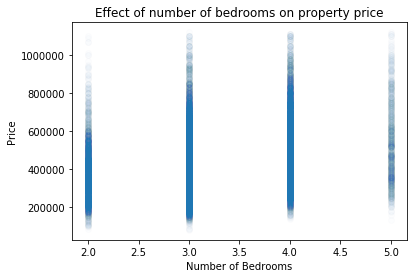

In [53]:
x = df['bedrooms']
y = df['price']
plt.scatter(x,y, alpha=0.0125)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Effect of number of bedrooms on property price')
plt.show()

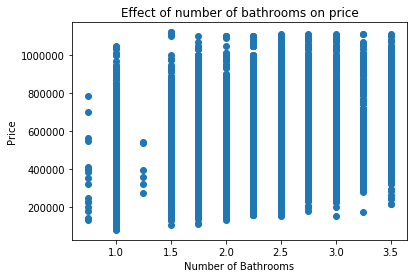

In [33]:
x2 = df['bathrooms']
y2 = df['price']
plt.scatter(x2,y2)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Effect of number of bathrooms on price')
plt.show()

# Models

In [38]:
X = df.drop(['price'], axis=1)
y = df['price']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [41]:
X_cte_train = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train,X_train)
results = baseline_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:19:48   Log-Likelihood:            -1.6052e+05
No. Observations:               12077   AIC:                         3.211e+05
Df Residuals:                   12068   BIC:                         3.211e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
id            1.49e-07   4.57e-07      0.326      0.745   -7.47e-07    1.05e-06
bedrooms    -1.439e+04   2160.735     -6.659      0.000   -1.86e+04   -1.02e+04
bathrooms   -2.705e+04   3067.122     -8.820      0.000   -3.31e+04    -2.1e+04
sqft_living   129.4398      3.506     36.916      0.000     122.567     136.313
sqft_lot       -9.3838      0.436    -21.512      0.000     -10.239      -8.529
floors      -1.634e+04   3252.884     -5.024      0.000   -2.27e+04   -9965.381
waterfront  -1.985e-12   6.83e-13     -2.907      0.004   -3.32e-12   -6.47e-13
condition    5.524e+04   2071.180     26.670      0.000    5.12e+04    5.93e+04
grade        1.048e+05   2279.895     45.952      0.000       1e+05    1.09e+05
yr_built     -284.6061      8.960    -31.765      0.000    -302.169    -267.043
==============================================================================
Omnibus:                      610.163   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.642
Skew:                           0.516   Prob(JB):                    5.53e-167
Kurtosis:                       3.674   Cond. No.                     2.06e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.5051989066736963

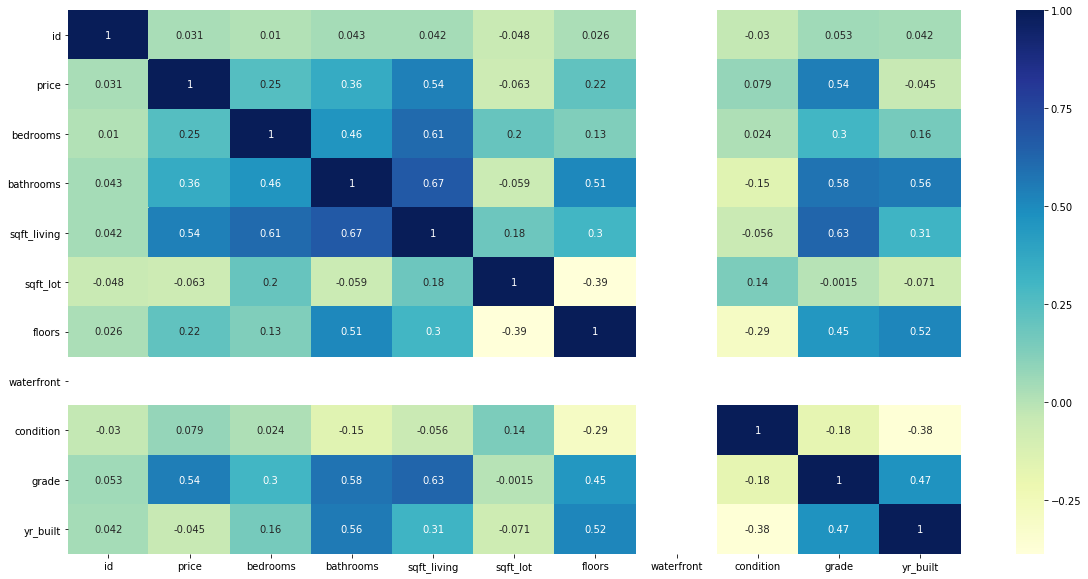

In [45]:
plt.figure(figsize=(20,10))
df1 = df.corr()
sns.heatmap(df1,cmap="YlGnBu",annot=True)
plt.show()

Using this heatmap we can see that price has a strong positive correlation with the sqft_living area of the space and
there are also good linear correlation relationships between the price and the number of bathrooms and bedrooms.
A strong correlation is also indicated between the bathrooms and floors is also noticeable. There by suggesting that more floors are in houses with a greater number of bathrooms. 